# Loading libraries

In [1]:
import glob2 as glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
import statsmodels.api as sm

import pandas as pd
pd.option_context("display.max_columns", None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading data

In [2]:
testDF = pd.read_csv('/content/drive/MyDrive/Research/IBM Advanced Data Science/test_DF.csv')
testDF.head()

,Sr No,Timestamp,Device Name,MAC Address,RSSI,Raw Data,Battery,Ambient Temperature,user_at,file_id,beacon_at,Timestamp2
0,2,2021-08-17 06:39:39.918,BrtBeacon402,C2:65:7C:E2:D6:6B,-59,-,21,170.1 Deg C,study,1,study,2021-08-17 06:39:40.000
1,5,2021-08-17 06:39:39.967,BMPkitchen,80:EC:CA:CD:2F:42,-81,1a4c0002150112233445566778899aabbccddeeff02716...,-,-,study,1,kitchen,2021-08-17 06:39:40.000
2,7,2021-08-17 06:39:40.027,BrtBeacon402,C2:65:7C:E2:D6:6B,-59,-,21,170.1 Deg C,study,1,study,2021-08-17 06:39:40.000
3,8,2021-08-17 06:39:40.059,BrtBeacon402,D9:C7:16:15:A3:0F,-94,-,21,170.1 Deg C,study,1,living,2021-08-17 06:39:40.000
4,11,2021-08-17 06:39:40.131,BrtBeacon402,C2:65:7C:E2:D6:6B,-57,-,21,170.1 Deg C,study,1,study,2021-08-17 06:39:40.000


In [3]:
testDF['user_at'].unique()

array(['study', 'main', 'living', 'kitchen', 'stairs2d', 'br2f'],
      dtype=object)

## Checking distributions

In [4]:
checkdist = pd.read_csv('/content/drive/MyDrive/Research/IBM Advanced Data Science/long_sample_study_rssi.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


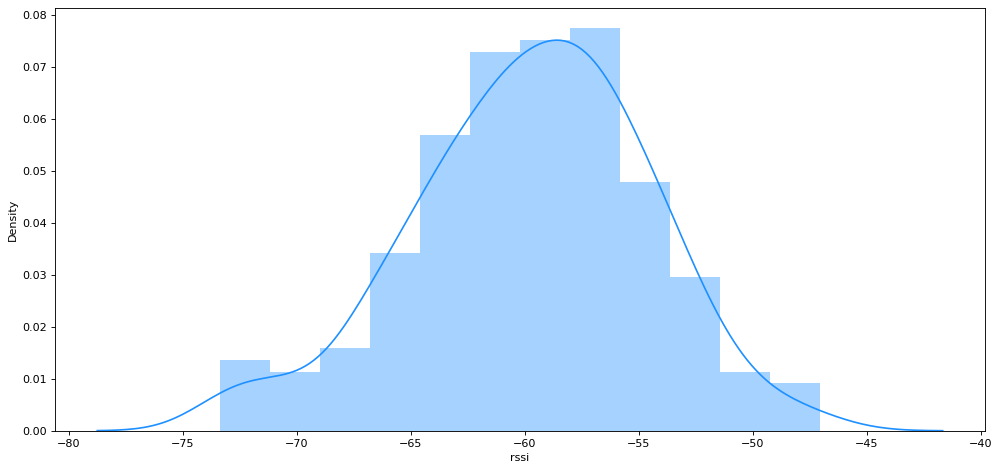

In [5]:
#np.log(-checkdist['RSSI'])
plt.figure(figsize=(15,7), dpi= 80)
sns.distplot(checkdist['rssi'], color="dodgerblue", label="Distribution")

In [6]:
from scipy.stats import shapiro
stats, p = shapiro(checkdist['rssi'])
if p > 0.05:
  print('probably Gaussian distribution with p-value of {}'.format(p))
else:
  print('probably not Gaussian distribution with p-value of {}'.format(p))

probably Gaussian distribution with p-value of 0.11727512627840042


## Removing non relevant features

In [7]:
testDF = testDF.drop(['Device Name', 'MAC Address', 'Raw Data', 'Battery', 'Ambient Temperature'], axis=1)
testDF.head()

,Sr No,Timestamp,RSSI,user_at,file_id,beacon_at,Timestamp2
0,2,2021-08-17 06:39:39.918,-59,study,1,study,2021-08-17 06:39:40.000
1,5,2021-08-17 06:39:39.967,-81,study,1,kitchen,2021-08-17 06:39:40.000
2,7,2021-08-17 06:39:40.027,-59,study,1,study,2021-08-17 06:39:40.000
3,8,2021-08-17 06:39:40.059,-94,study,1,living,2021-08-17 06:39:40.000
4,11,2021-08-17 06:39:40.131,-57,study,1,study,2021-08-17 06:39:40.000


## Removing noise

In order to get better results for the model it would be better to remove the noise. 

A Savitzky-Golay as well as a lowess filter are applied in order to reduce the noise.

### Checking signals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


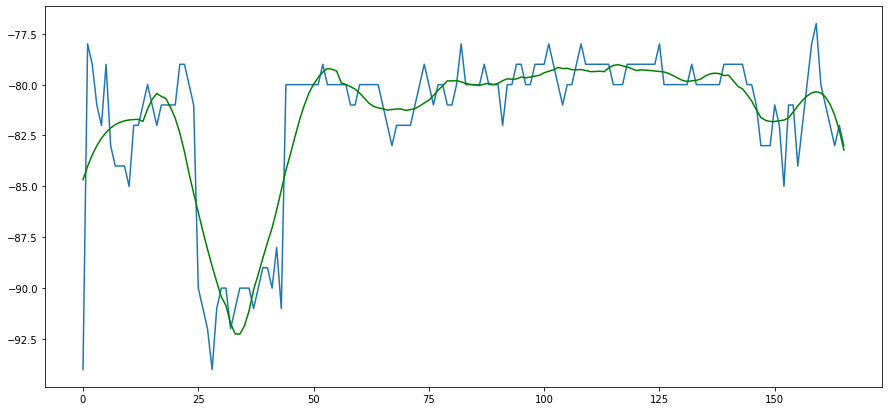

In [8]:
# Filtering
beacon = 'living'
tmpDf = testDF[(testDF['file_id'] == 1) & (testDF['beacon_at'] == beacon)]
tmpDf['id']=range(0,len(tmpDf))

y_hat = savgol_filter(tmpDf['RSSI'], 25, 3)

plt.figure(figsize = (15, 7))
plt.plot(tmpDf['id'], tmpDf['RSSI'])
plt.plot(tmpDf['id'], y_hat, color='green')
plt.show()

In [ ]:
#?savgol_filter
# scipy.signal.savgol_filter(x, window_length, polyorder, deriv=0, delta=1.0, axis=- 1, mode='interp', cval=0.0)[source]

Changing parameters of Savgol's filter

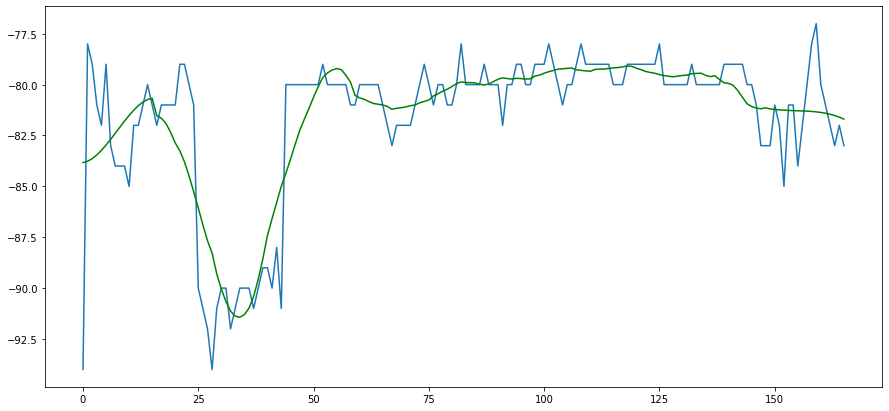

In [9]:
y_hat = savgol_filter(tmpDf['RSSI'], 31, 3)

plt.figure(figsize = (15, 7))
plt.plot(tmpDf['id'], tmpDf['RSSI'])
plt.plot(tmpDf['id'], y_hat, color='green')
plt.show()

Implementing loess filter

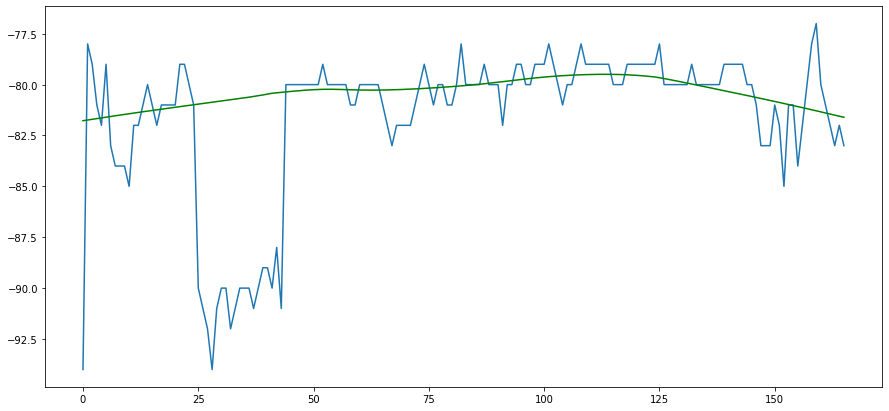

In [10]:
# %%
#y_loess = sm.nonparametric.lowess(tmpDf['RSSI'], tmpDf['id'], frac = 1./3)
y_loess = sm.nonparametric.lowess(tmpDf['RSSI'], tmpDf['id'], frac = 1./2)
y_hat_loess = list(y_loess[:,1])
#print(y_hat_loess)

plt.figure(figsize=(15, 7))
plt.plot(tmpDf['id'], tmpDf['RSSI'])
plt.plot(tmpDf['id'], y_hat_loess, color='green')
plt.show()

-80.89421591550436 -79.91175122556218


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


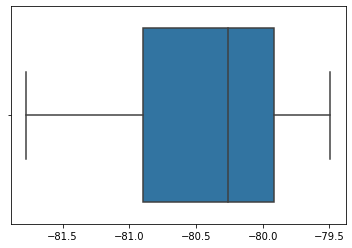

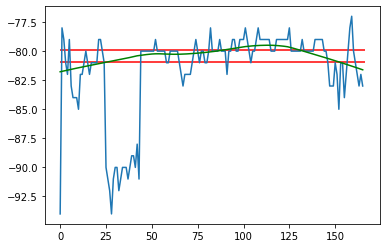

In [11]:
q1, q3 = np.percentile(sorted(y_hat_loess), [25, 75])
print(q1, q3)

sns.boxplot(y_hat_loess)
plt.show()

plt.plot(tmpDf['id'], tmpDf['RSSI'])
plt.plot(tmpDf['id'], y_hat_loess, color='green')
plt.hlines([q1, q3], xmin=0, xmax=len(tmpDf), color='red')
plt.show()

# Summary

We will use a loess filter to smooth the RSSI from the beacons and thus improve the results. This algorithm will be applied to all the signals from beacons.